In [2]:
import pandas as pd
import numpy as np

companies=pd.read_csv(r'C:\Users\rpatil\Desktop\python\ML&AI_NOTES\companies.csv',encoding='ISO-8859-1')
print (companies['permalink'])
print (companies.head())
companies.permalink = companies.permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies.name = companies.name.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
print (companies.head())

rounds2=pd.read_csv(r'C:\Users\rpatil\Desktop\python\ML&AI_NOTES\rounds2.csv',header=0,encoding = 'ISO-8859-1')
print (rounds2.head())
rounds2.company_permalink = rounds2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
print (rounds2.head())

0                                      /Organization/-Fame
1                                   /Organization/-Qounter
2                      /Organization/-The-One-Of-Them-Inc-
3                                    /Organization/0-6-Com
4                           /Organization/004-Technologies
                               ...                        
66363    /Organization/Zznode-Science-And-Technology-Co...
66364                            /Organization/Zzzzapp-Com
66365                               /Organization/ÃÂEron
66366                            /Organization/ÃâAsys-2
66367    /Organization/ÃÂ°Novatiff-Reklam-Ve-TanÃ¤Â±TÃ...
Name: permalink, Length: 66368, dtype: object
                             permalink                    name  \
0                  /Organization/-Fame                   #fame   
1               /Organization/-Qounter                :Qounter   
2  /Organization/-The-One-Of-Them-Inc-  (THE) ONE of THEM,Inc.   
3                /Organization/0-6-Com   

In [4]:
#task 1 code starts from here
#How many unique companies are present in rounds2?   66370

rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
print("data presrnt in rounds2",len(rounds2['company_permalink'].unique()))

#Reconfirming -about the clarifications using describe
rounds2['company_permalink'].str.lower().describe()


# How many unique companies are present in companies?
companies['permalink'] = companies['permalink'].str.lower()
print("data present in companies",len(companies['permalink'].unique()))

#Reconfirming - about the calculations using describe
companies['permalink'].str.lower().describe()


data presrnt in rounds2 66368
data present in companies 66368


count                        66368
unique                       66368
top       /organization/stocktwits
freq                             1
Name: permalink, dtype: object

In [5]:
#Are there any companies in the rounds2 file which are not present in companies?
round_temp = pd.DataFrame(rounds2.company_permalink.unique())
comp_temp = pd.DataFrame(companies.permalink.unique())
print (comp_temp.equals(round_temp))

set(companies['permalink'].unique()).difference(set(rounds2['company_permalink'].unique()))



True


set()

In [74]:
#Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame.
master_frame = pd.merge(rounds2, companies, how = 'left', left_on = 'company_permalink', right_on = 'permalink')
print ("count in master data frame",len(master_frame.index))
print (master_frame['funding_round_type'])
print (master_frame.describe())

count in master data frame 114949
0                  venture
1                  venture
2                     seed
3                  venture
4                  venture
                ...       
114944    convertible_note
114945                seed
114946             venture
114947                seed
114948               grant
Name: funding_round_type, Length: 114949, dtype: object
       raised_amount_usd
count       9.495900e+04
mean        1.042687e+07
std         1.148212e+08
min         0.000000e+00
25%         3.225000e+05
50%         1.680511e+06
75%         7.000000e+06
max         2.127194e+10


In [8]:
#sub task 1.3 cleaning the data by dropping null values and unnecessary columns and rowss
data=master_frame.isnull().sum(axis=0)
print (data)


#checking the Null values percentage , column-wise
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))


company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.

In [9]:
#dropping columns other than required data likecompany_permalink,funding_round_type  raised_amount_usd,country_code, category_list etc
master_frame = master_frame.drop(['funding_round_code', 'funding_round_permalink', 'funded_at','permalink', 'homepage_url',
                                 'state_code', 'region', 'city', 'founded_at','status'], axis = 1)
print (master_frame)

                                        company_permalink funding_round_type  \
0                                     /organization/-fame            venture   
1                                  /organization/-qounter            venture   
2                                  /organization/-qounter               seed   
3                     /organization/-the-one-of-them-inc-            venture   
4                                   /organization/0-6-com            venture   
...                                                   ...                ...   
114944                          /organization/zzzzapp-com   convertible_note   
114945                          /organization/zzzzapp-com               seed   
114946                                 /organization/eron            venture   
114947                               /organization/asys-2               seed   
114948  /organization/novatiff-reklam-ve-tantm-hizmetl...              grant   

        raised_amount_usd              

In [10]:
#checking the Null values percentage again after deletion, column-wise
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     17.39
name                   0.00
category_list          2.97
country_code           7.55
dtype: float64


In [11]:
#dropping unnecessary columns which are  null

master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull() | master_frame['country_code'].isnull() |
                             master_frame['category_list'].isnull())]
print (master_frame)

                          company_permalink funding_round_type  \
0                       /organization/-fame            venture   
2                    /organization/-qounter               seed   
4                     /organization/0-6-com            venture   
6          /organization/01games-technology        undisclosed   
7       /organization/0ndine-biomedical-inc               seed   
...                                     ...                ...   
114942            /organization/zzzzapp-com               seed   
114943            /organization/zzzzapp-com               seed   
114944            /organization/zzzzapp-com   convertible_note   
114945            /organization/zzzzapp-com               seed   
114947                 /organization/asys-2               seed   

        raised_amount_usd                    name  \
0              10000000.0                   #fame   
2                700000.0                :Qounter   
4               2000000.0                 0-6.co

In [12]:
#Observing the unique funding_round_type i.e by checking count
count=master_frame.funding_round_type.value_counts()
print (count)

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64


In [13]:
#Retaining the rows with only four investment types, filtering it out using them
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture')
                            | (master_frame['funding_round_type'] == 'seed')
                            | (master_frame['funding_round_type'] == 'angel')
                            | (master_frame['funding_round_type'] == 'private_equity')]
print (master_frame.head())

                     company_permalink funding_round_type  raised_amount_usd  \
0                  /organization/-fame            venture         10000000.0   
2               /organization/-qounter               seed           700000.0   
4                /organization/0-6-com            venture          2000000.0   
7  /organization/0ndine-biomedical-inc               seed            43360.0   
8  /organization/0ndine-biomedical-inc            venture           719491.0   

                     name                                      category_list  \
0                   #fame                                              Media   
2                :Qounter  Application Platforms|Real Time|Social Network...   
4                 0-6.com                                        Curated Web   
7  Ondine Biomedical Inc.                                      Biotechnology   
8  Ondine Biomedical Inc.                                      Biotechnology   

  country_code  
0          IND  
2   

In [14]:
#task 2.2 calculting average investment amount for each type of funding

#Converting $ to million $ which will be easy for further calculations.
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000
print (master_frame.head())


#calculating average investment amount for each of the four funding types.
print (round(master_frame.groupby('funding_round_type').raised_amount_usd.mean(), 2))

#Retaining rows with only venture type since it occurs in out budget range
master_frame = master_frame[master_frame['funding_round_type'] == 'venture']

#Dropping the column 'funding_round_type' as it is going to be venture from now
master_frame = master_frame.drop(['funding_round_type'], axis = 1)

                     company_permalink funding_round_type  raised_amount_usd  \
0                  /organization/-fame            venture          10.000000   
2               /organization/-qounter               seed           0.700000   
4                /organization/0-6-com            venture           2.000000   
7  /organization/0ndine-biomedical-inc               seed           0.043360   
8  /organization/0ndine-biomedical-inc            venture           0.719491   

                     name                                      category_list  \
0                   #fame                                              Media   
2                :Qounter  Application Platforms|Real Time|Social Network...   
4                 0-6.com                                        Curated Web   
7  Ondine Biomedical Inc.                                      Biotechnology   
8  Ondine Biomedical Inc.                                      Biotechnology   

  country_code  
0          IND  
2   

In [15]:
top9 = master_frame.pivot_table(values = 'raised_amount_usd', index = 'country_code', aggfunc = 'sum')
top9 = top9.sort_values(by = 'raised_amount_usd', ascending = False)
top9 = top9.iloc[:9, ]  #using iloc we can extract the data based on index number 
print (top9)

              raised_amount_usd
country_code                   
USA               420068.029342
CHN                39338.918773
GBR                20072.813004
IND                14261.508718
CAN                 9482.217668
FRA                 7226.851352
ISR                 6854.350477
DEU                 6306.921981
JPN                 3167.647127


In [16]:
#Retaining rows with only USA, GBR and IND country_codes. As SparksFunds wants to invest in only top three English speaking countries.
master_frame = master_frame[(master_frame['country_code'] == 'USA')
                            | (master_frame['country_code'] == 'GBR')
                            | (master_frame['country_code'] == 'IND')]
print (master_frame)


                 company_permalink  raised_amount_usd          name  \
0              /organization/-fame          10.000000         #fame   
10            /organization/0xdata          20.000000        H2O.ai   
11            /organization/0xdata           1.700000        H2O.ai   
12            /organization/0xdata           8.900000        H2O.ai   
22      /organization/1-mainstream           5.000000  1 Mainstream   
...                            ...                ...           ...   
114920    /organization/zyomyx-inc          12.000000        ZYOMYX   
114922    /organization/zyomyx-inc          14.219999        ZYOMYX   
114923    /organization/zyomyx-inc           0.555016        ZYOMYX   
114934         /organization/zyrra           0.140500         Zyrra   
114936        /organization/zystor           8.500000        Zystor   

                           category_list country_code  
0                                  Media          IND  
10                             Anal

In [17]:
#subtask 4.1 : sector analysis

#Extracting the primary vector value
master_frame['category_list'] = master_frame['category_list'].apply(lambda x: x.split('|')[0])
print (master_frame)


                 company_permalink  raised_amount_usd          name  \
0              /organization/-fame          10.000000         #fame   
10            /organization/0xdata          20.000000        H2O.ai   
11            /organization/0xdata           1.700000        H2O.ai   
12            /organization/0xdata           8.900000        H2O.ai   
22      /organization/1-mainstream           5.000000  1 Mainstream   
...                            ...                ...           ...   
114920    /organization/zyomyx-inc          12.000000        ZYOMYX   
114922    /organization/zyomyx-inc          14.219999        ZYOMYX   
114923    /organization/zyomyx-inc           0.555016        ZYOMYX   
114934         /organization/zyrra           0.140500         Zyrra   
114936        /organization/zystor           8.500000        Zystor   

        category_list country_code  
0               Media          IND  
10          Analytics          USA  
11          Analytics          USA  

In [18]:
#now mapping each sector to its main sector

#reading mapping.csv file and performing calculations on it

mapping=pd.read_csv(r'C:\Users\rpatil\Desktop\python\ML&AI_NOTES\mapping.csv')
mapping.category_list = mapping.category_list.replace({'0':'na', '2.na' :'2.0'}, regex=True)
print (mapping.head())

   category_list  Automotive & Sports  Blanks  Cleantech / Semiconductors  \
0            NaN                    0       1                           0   
1             3D                    0       0                           0   
2    3D Printing                    0       0                           0   
3  3D Technology                    0       0                           0   
4     Accounting                    0       0                           0   

   Entertainment  Health  Manufacturing  News, Search and Messaging  Others  \
0              0       0              0                           0       0   
1              0       0              1                           0       0   
2              0       0              1                           0       0   
3              0       0              1                           0       0   
4              0       0              0                           0       0   

   Social, Finance, Analytics, Advertising  
0                

In [19]:
#Reshaping the mapping dataframe to merge with the master_frame dataframe. Using melt() function to unpivot the table.
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising'])
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping = mapping.rename(columns = {"variable":"main_sector"})
print (mapping.head())

         category_list    main_sector
1                   3D  Manufacturing
2          3D Printing  Manufacturing
3        3D Technology  Manufacturing
7   Advanced Materials  Manufacturing
15         Agriculture  Manufacturing


In [20]:
master_frame = master_frame.merge(mapping, how = 'left', on ='category_list')
print (master_frame.head())


            company_permalink  raised_amount_usd          name category_list  \
0         /organization/-fame               10.0         #fame         Media   
1        /organization/0xdata               20.0        H2O.ai     Analytics   
2        /organization/0xdata                1.7        H2O.ai     Analytics   
3        /organization/0xdata                8.9        H2O.ai     Analytics   
4  /organization/1-mainstream                5.0  1 Mainstream          Apps   

  country_code                              main_sector  
0          IND                            Entertainment  
1          USA  Social, Finance, Analytics, Advertising  
2          USA  Social, Finance, Analytics, Advertising  
3          USA  Social, Finance, Analytics, Advertising  
4          USA               News, Search and Messaging  


In [21]:
#List of primary sectors which have no main sectors in the master_frame
print(master_frame[master_frame.main_sector.isnull()].category_list.unique())

['Nanotechnology' 'Natural Gas Uses' 'Natural Language Processing'
 'Enterprise 2.0' 'Adaptive Equipment' 'Racing' 'Specialty Retail'
 'Biotechnology and Semiconductor' 'Rapidly Expanding' 'Navigation'
 'Product Search' 'GreenTech' 'Retirement']


In [22]:
#Number of rows with NaN masin_sector value
print (len(master_frame[master_frame.main_sector.isnull()]))

165


In [23]:
#Retaining the rows which have main_sector values
master_frame = master_frame[~(master_frame.main_sector.isnull())]
print (len(master_frame.index))

38638


In [28]:
#sector analysis 2 , creating threee frames D1 , D2, D3

D1 = master_frame[(master_frame['country_code'] == 'USA') &
             (master_frame['raised_amount_usd'] >= 5) &
             (master_frame['raised_amount_usd'] <= 15)]
D1_new = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D1 = D1.merge(D1_new, how='left', on ='main_sector')
print (D1.head())

                 company_permalink  raised_amount_usd               name  \
0             /organization/0xdata           8.900000             H2O.ai   
1       /organization/1-mainstream           5.000000       1 Mainstream   
2     /organization/128-technology          11.999347     128 Technology   
3  /organization/1366-technologies          15.000000  1366 Technologies   
4  /organization/1366-technologies           5.000000  1366 Technologies   

       category_list country_code                              main_sector  \
0          Analytics          USA  Social, Finance, Analytics, Advertising   
1               Apps          USA               News, Search and Messaging   
2  Service Providers          USA                                   Others   
3      Manufacturing          USA                            Manufacturing   
4      Manufacturing          USA                            Manufacturing   

   (raised_amount_usd, Total_amount)  (raised_amount_usd, Total_count)  
0

In [29]:
D2 = master_frame[(master_frame['country_code'] == 'GBR') &
             (master_frame['raised_amount_usd'] >= 5) &
             (master_frame['raised_amount_usd'] <= 15)]
D2_new = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D2 = D2.merge(D2_new, how='left', on ='main_sector')
print (D2.head())

         company_permalink  raised_amount_usd       name     category_list  \
0  /organization/365scores           5.500000  365Scores           Android   
1   /organization/7digital           8.468328   7digital  Content Creators   
2   /organization/7digital          10.000000   7digital  Content Creators   
3      /organization/90min          15.000000      90min             Media   
4      /organization/90min           5.800000      90min             Media   

  country_code                              main_sector  \
0          GBR  Social, Finance, Analytics, Advertising   
1          GBR                            Entertainment   
2          GBR                            Entertainment   
3          GBR                            Entertainment   
4          GBR                            Entertainment   

   (raised_amount_usd, Total_amount)  (raised_amount_usd, Total_count)  
0                        1089.404014                               133  
1                         482.

In [30]:
D3 = master_frame[(master_frame['country_code'] == 'IND') &
             (master_frame['raised_amount_usd'] >= 5) &
             (master_frame['raised_amount_usd'] <= 15)]
D3_new = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D3 = D3.merge(D3_new, how='left', on ='main_sector')
print (D3.head())

                company_permalink  raised_amount_usd            name  \
0             /organization/-fame          10.000000           #fame   
1  /organization/21diamonds-india           6.369507      21Diamonds   
2    /organization/a-little-world           6.410000  A LITTLE WORLD   
3    /organization/adlabs-imagica           8.180000  Adlabs Imagica   
4             /organization/agile           5.740000           Agile   

   category_list country_code                              main_sector  \
0          Media          IND                            Entertainment   
1     E-Commerce          IND                                   Others   
2        Finance          IND  Social, Finance, Analytics, Advertising   
3  Entertainment          IND                            Entertainment   
4        Finance          IND  Social, Finance, Analytics, Advertising   

   (raised_amount_usd, Total_amount)  (raised_amount_usd, Total_count)  
0                         280.830000             

In [27]:
#Total number of investments (count)
print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())


12012
619
328


In [31]:
#Total amount of investment (USD)
print(round(D1.raised_amount_usd.sum(), 2))
print(round(D2.raised_amount_usd.sum(), 2))
print(round(D3.raised_amount_usd.sum(), 2))

107318.29
5365.23
2949.54


In [48]:
#Top sector, second-top, third-top for D1 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D1
D1_new=D1_new.sort_values('main_sector',ascending = False)
print (D1_new.head())


                                        raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Social, Finance, Analytics, Advertising      23807.376964        2714
Others                                       26321.007002        2950
News, Search and Messaging                   13959.567428        1582
Manufacturing                                 7258.553378         799
Health                                        8211.859357         909


In [47]:
#Top sector, second-top, third-top for D2 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D2
D2_new=D2_new.sort_values('main_sector',ascending = False)
print (D2_new.head())

                                        raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Social, Finance, Analytics, Advertising       1089.404014         133
Others                                        1283.624289         147
News, Search and Messaging                     615.746235          73
Manufacturing                                  361.940335          42
Health                                         214.537510          24


In [46]:
#Top sector, second-top, third-top for D3 (based on count of investments)
#Number of investments in the top, second-top, third-top sector in D3
D3_new=D3_new.sort_values('main_sector',ascending = False)
print (D3_new.head())


                                        raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Social, Finance, Analytics, Advertising        550.549550          60
Others                                        1013.409507         110
News, Search and Messaging                     433.834545          52
Manufacturing                                  200.900000          21
Health                                         167.740000          19


In [49]:
#For the top sector USA , which company received the highest investment?
company = D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                           raised_amount_usd
company_permalink                           
/organization/shotspotter          67.933006


In [50]:
#For the second top sector USA , which company received the highest investment?
company = D1[D1['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                           raised_amount_usd
company_permalink                           
/organization/virtustream               64.3


In [51]:
#For the third top sector USA , which company received the highest investment?
company = D1[D1['main_sector']=='News, Search and Messaging']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                                raised_amount_usd
company_permalink                                
/organization/airspan-networks             81.769


In [53]:
#For the top sector GBR , which company received the highest investment?
company = D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                                     raised_amount_usd
company_permalink                                     
/organization/celltick-technologies               37.5


In [52]:
#For the second top sector GBR , which company received the highest investment?
company = D2[D2['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                              raised_amount_usd
company_permalink                              
/organization/electric-cloud               37.0


In [54]:
#For the third top sector GBR , which company received the highest investment?
company = D2[D2['main_sector']=='News, Search and Messaging']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                         raised_amount_usd
company_permalink                         
/organization/ubiquisys               37.0


In [57]:
#For the top sector IND , which company received the highest investment?
company = D3[D3['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                               raised_amount_usd
company_permalink                               
/organization/manthan-systems               50.7


In [56]:
#For the second top sector IND , which company received the highest investment?
company = D3[D3['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))


                            raised_amount_usd
company_permalink                            
/organization/firstcry-com               39.0


In [58]:
#For the third top sector IND , which company received the highest investment?
company = D3[D3['main_sector']=='News, Search and Messaging']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                                                raised_amount_usd
company_permalink                                                
/organization/gupshup-technology-india-pvt-ltd               33.0


In [60]:
import matplotlib.pyplot as plt

# the commonly used alias for seaborn is sns
import seaborn as sns

# set a seaborn style of your taste
sns.set_style("whitegrid")

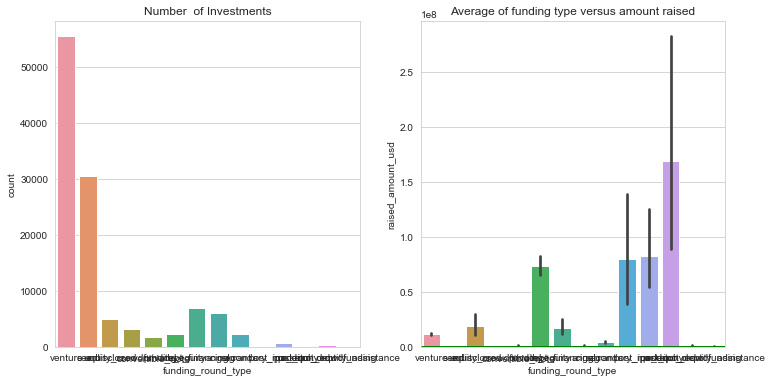

In [76]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="funding_round_type", data=master_frame)
plt.title("Number  of Investments")
plt.subplot(1, 2, 2)
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=master_frame, estimator=np.mean)
plt.title("Average of funding type versus amount raised")
plt.axhline(y=5, linewidth=2, color = 'g')
plt.axhline(y=25, linewidth=2, color = 'g')
plt.show()